In [1]:
import pygrib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
grbs = pygrib.open('gfs.t00z.pgrb2.0p25.f038')

In [3]:
for grb in grbs:
    print grb

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 38 hrs:from 201701310000
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 38 hrs:from 201701310000
3:224:224 (instant):regular_ll:unknown:level 0 220:fcst time 38 hrs:from 201701310000
4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 38 hrs:from 201701310000
5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 38 hrs:from 201701310000
6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 38 hrs:from 201701310000
7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 38 hrs:from 201701310000
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 38 hrs:from 201701310000
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 38 hrs:from 201701310000
10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricIn

In [4]:
for key in grb.keys():
    print key

parametersVersion
definitionFilesVersion
truncateDegrees
offset
count
countTotal
unitsFactor
unitsBias
globalDomain
libraryVersion
kindOfProduct
GRIBEditionNumber
grib2divider
missingValue
ieeeFloats
section0Length
identifier
discipline
editionNumber
totalLength
sectionNumber
section1Length
numberOfSection
centre
subCentre
tablesVersion
masterDir
localTablesVersion
significanceOfReferenceTime
year
month
day
hour
minute
second
dataDate
julianDay
dataTime
productionStatusOfProcessedData
typeOfProcessedData
selectStepTemplateInterval
selectStepTemplateInstant
stepType
sectionNumber
grib2LocalSectionPresent
sectionNumber
gridDescriptionSectionPresent
section3Length
numberOfSection
sourceOfGridDefinition
numberOfDataPoints
numberOfOctectsForNumberOfPoints
interpretationOfNumberOfPoints
PLPresent
gridDefinitionTemplateNumber
shapeOfTheEarth
scaleFactorOfRadiusOfSphericalEarth
scaledValueOfRadiusOfSphericalEarth
scaleFactorOfEarthMajorAxis
scaledValueOfEarthMajorAxis
scaleFactorOfEarthMinorAx

In [5]:
u10_grb = grbs.select(name='10 metre U wind component', typeOfLevel='heightAboveGround', level=10)[0]
v10_grb = grbs.select(name='10 metre V wind component', typeOfLevel='heightAboveGround', level=10)[0]
t2_grb = grbs.select(name='2 metre temperature', typeOfLevel='heightAboveGround', level=2)[0]

In [6]:
u10 = u10_grb.values
v10 = v10_grb.values
t2 = t2_grb.values
print t2.shape, u10.shape, v10.shape

(721, 1440) (721, 1440) (721, 1440)


In [7]:
lats, lons = grb.latlons()
print lats.shape, lons.shape, lats.min(), lons.max()

(721, 1440) (721, 1440) -90.0 359.75


In [8]:
from mpl_toolkits.basemap import Basemap

/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


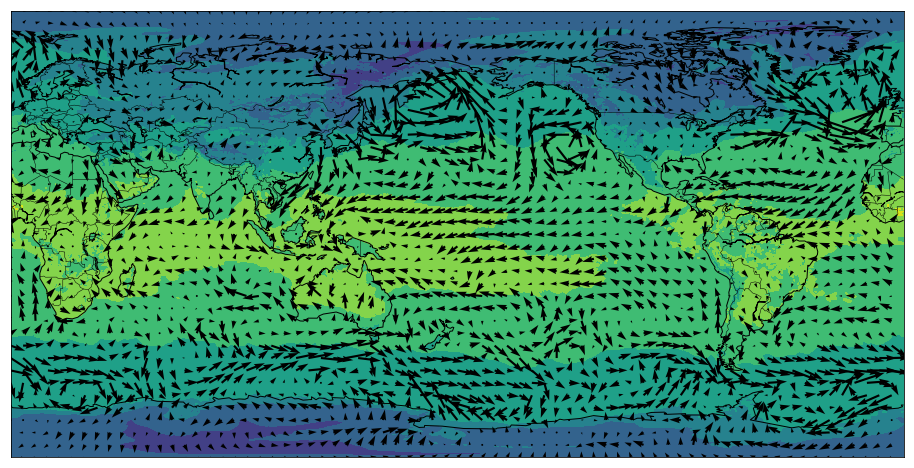

In [9]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=lons.min(), llcrnrlat=lats.min(), urcrnrlon=lons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 20

cs = m.contourf(lons, lats, t2)
qv = m.quiver(lons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


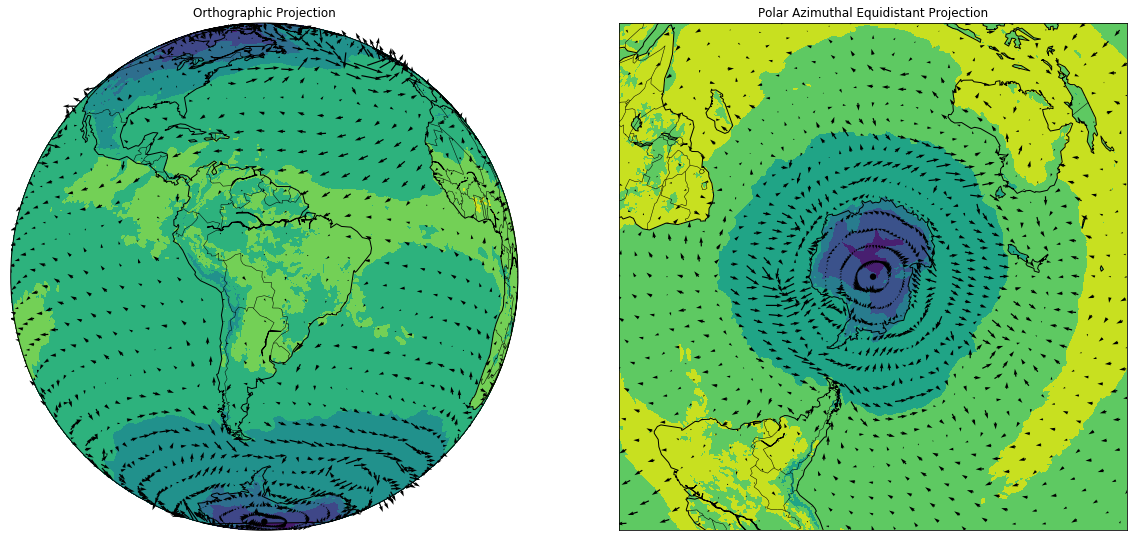

In [10]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(121)
ax1.set_title('Orthographic Projection')

m = Basemap(projection='ortho',lat_0=-15,lon_0=300, ax=ax1)

m.drawcoastlines()
m.drawcountries()

skip = 20

x, y = m(lons, lats)

cs = m.contourf(x, y, t2)
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

ax2 = fig.add_subplot(122)
ax2.set_title('Polar Azimuthal Equidistant Projection')

m = Basemap(projection='spaeqd',boundinglat=-10,lon_0=270, ax=ax2)

m.drawcoastlines()
m.drawcountries()

skip = 20

x, y = m(lons, lats)

cs = m.contourf(x, y, t2)
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

In [11]:
def flip_grid(var, lons):
    fltr = lons[0] >= 180
    newlons = np.concatenate(((lons - 360)[:, fltr], lons[:, ~fltr]), axis=-1)
    newvar = np.concatenate((var[:, fltr], var[:, ~fltr]), axis=-1)
    
    return newvar, newlons

In [12]:
u10, newlons = flip_grid(u10, lons)
v10, newlons = flip_grid(v10, lons)
t2, newlons = flip_grid(t2, lons)

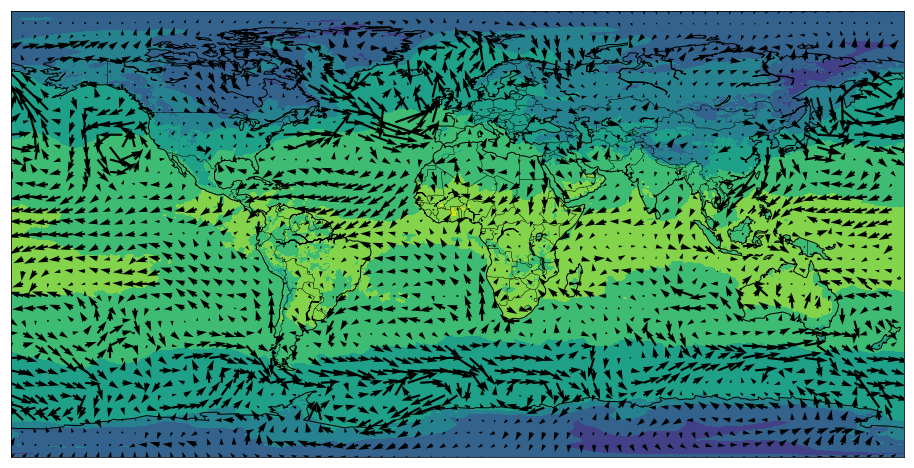

In [13]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=newlons.min(), llcrnrlat=lats.min(), urcrnrlon=newlons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 20

cs = m.contourf(newlons, lats, t2)
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

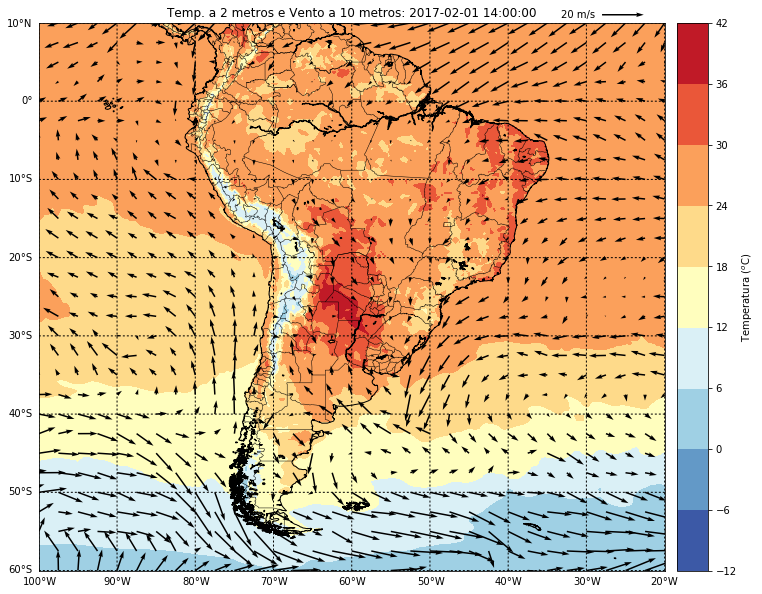

In [14]:
fig = plt.figure(figsize=(12,25))
m = Basemap(llcrnrlon=-100, llcrnrlat=-60, urcrnrlon=-20, urcrnrlat=10, resolution='i')

parallels = np.arange(-90, 90, 10)
meridians = np.arange(0, 360, 10)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawparallels(parallels, labels=[1, 0, 0, 0])

skip = 10

plt.title('Temp. a 2 metros e Vento a 10 metros: %s' % u10_grb.validDate)

cs = m.contourf(newlons, lats, t2 - 273.15, cmap='RdYlBu_r')
cbar = m.colorbar(cs)
cbar.set_label(r'Temperatura ($^{o}$C)')
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip], scale=300)
qk = plt.quiverkey(qv, 0.9, 1.015, 20, '20 m/s', labelpos='W')

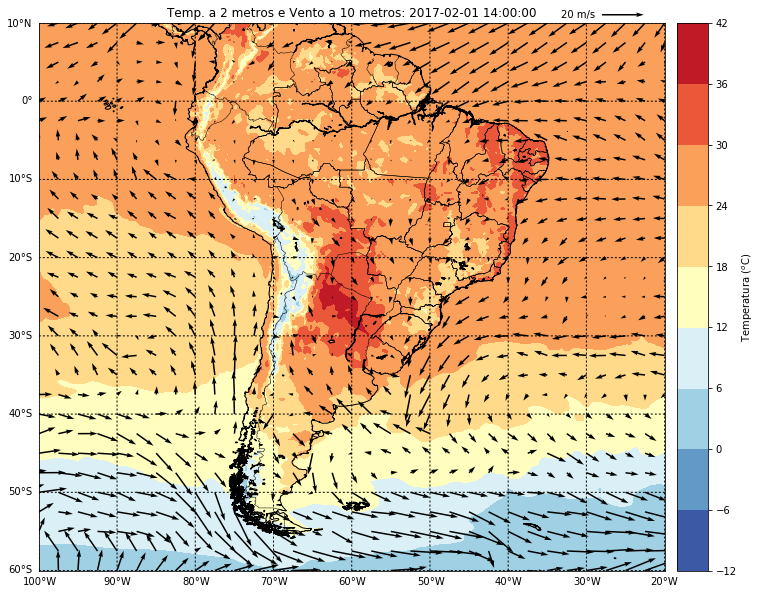

In [15]:
fig = plt.figure(figsize=(12,25))
m = Basemap(llcrnrlon=-100, llcrnrlat=-60, urcrnrlon=-20, urcrnrlat=10, resolution='i')

parallels = np.arange(-90, 90, 10)
meridians = np.arange(0, 360, 10)

m.drawcoastlines()
m.drawcountries()
m.readshapefile('/home/rafaelca/estados_2010_shapefile/estados_2010', 'estado_2010')
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawparallels(parallels, labels=[1, 0, 0, 0])

skip = 10

plt.title('Temp. a 2 metros e Vento a 10 metros: %s' % u10_grb.validDate)

cs = m.contourf(newlons, lats, t2 - 273.15, cmap='RdYlBu_r')
cbar = m.colorbar(cs)
cbar.set_label(r'Temperatura ($^{o}$C)')
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip], scale=300)
qk = plt.quiverkey(qv, 0.9, 1.015, 20, '20 m/s', labelpos='W')

In [16]:
list_of_messages = grbs.select(shortName='u', typeOfLevel='isobaricInhPa')

up = []
lev = []

for grb in list_of_messages:
    up.append(grb.values)
    lev.append(grb.level)
    
up = np.array(up)
lev = np.array(lev)

print lev, lev.shape, up.shape

[   1    2    3    5    7   10   20   30   50   70  100  150  200  250  300
  350  400  450  500  550  600  650  700  750  800  850  900  925  950  975
 1000] (31,) (31, 721, 1440)


In [18]:
def find_nearest(x, y, gridx, gridy):

    distance = ( gridx - x )**2 + ( gridy - y )**2
    idx = np.where( distance == distance.min() )
    
    return idx

In [19]:
idx = find_nearest(-46.616667, -23.650000, newlons, lats)

print newlons[idx[0], idx[1]], lats[idx[0], idx[1]]

[-46.5] [-23.75]


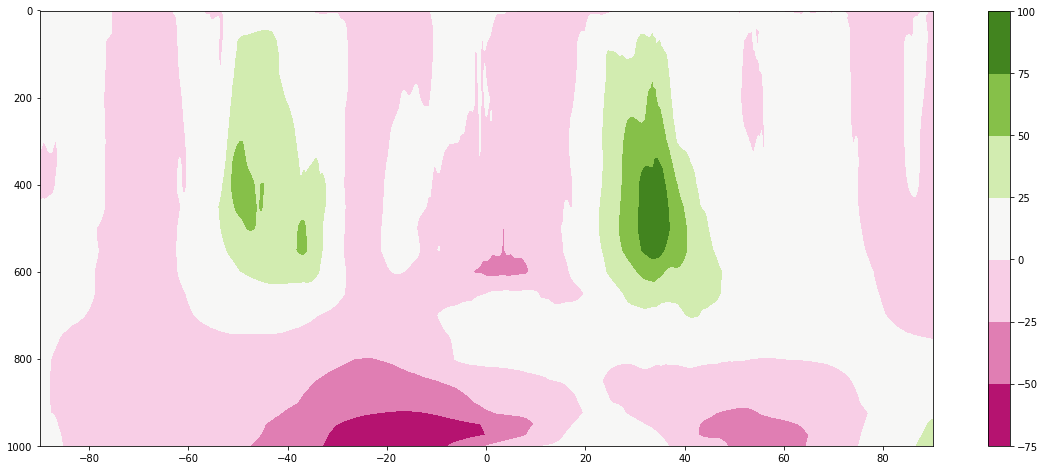

In [23]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlats, levs = np.meshgrid(lats[:, idx[1]], lev)
up_vert = up[:, :, idx[1]]

cs = ax.contourf(newlats, levs, up_vert[:, :, 0], cmap='PiYG')
cbar = plt.colorbar(cs)
ax.invert_yaxis()